In [1]:
import sys
import os
sys.path.append('/nfs/homedirs/giri/masterthesis')
os.chdir('/nfs/homedirs/giri/masterthesis')

In [2]:
import torch
import os
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from pylab import rcParams
from PIL import Image
from IPython.display import display
from robust_priornet.eval.uncertainty import UncertaintyMeasuresEnum

In [3]:
model_dir="runtime-model-vgg16-40epochs-svhn-lr0.0007500000000000001-a1000-g1.0-c1.0"
batch_size=128
n_in=32
num_channels=3
data_dir="./runtime-data"
in_dataset="SVHN"
ood_dataset="CIFAR10"
target_precision=1000 # one on which model was trained

## Misclassify detect task (only In domain dataset) evaluation (CPU)
#### For GPU eval, use seml script eval_seml.py
Label = 1 is a misclassified sample

Label = 0 is a correctly classified sample

In [10]:
out_dir=model_dir+"/eval"

In [14]:
cmd = f"python -m robust_priornet.eval_priornet --gpu -1 --model_dir {model_dir} --result_dir {out_dir} --target_precision {target_precision} --task misclassification_detect --batch_size {batch_size} {data_dir} {in_dataset} {ood_dataset}"
print(cmd)

python -m robust_priornet.eval_priornet --gpu -1 --model_dir runtime-model-vgg16-40epochs-svhn-lr0.0007500000000000001-a1000-g1.0-c1.0 --result_dir runtime-model-vgg16-40epochs-svhn-lr0.0007500000000000001-a1000-g1.0-c1.0/eval --target_precision 1000 --task misclassification_detect --batch_size 128 ./runtime-data SVHN CIFAR10


In [15]:
os.system(cmd)

0

## OOD Detect task (Both In-domain and OOD dataset) evaluation (CPU)
#### For GPU eval, use seml script eval_seml.py

Label = 1 is a out of distribution sample

Label = 0 is a in distribution sample

In [21]:
ood_dataset="CIFAR100"
out_dir=model_dir+"/ood-eval-cifar100"

In [22]:
cmd = f"python -m robust_priornet.eval_priornet --gpu -1 --batch_size {batch_size} --task ood_detect --target_precision {target_precision} --model_dir {model_dir} --result_dir {out_dir} {data_dir} {in_dataset} {ood_dataset}"
print(cmd)

python -m robust_priornet.eval_priornet --gpu -1 --batch_size 128 --task ood_detect --target_precision 1000 --model_dir runtime-model-vgg16-40epochs-svhn-lr0.0007500000000000001-a1000-g1.0-c1.0 --result_dir runtime-model-vgg16-40epochs-svhn-lr0.0007500000000000001-a1000-g1.0-c1.0/ood-eval-cifar100 ./runtime-data SVHN CIFAR100


In [23]:
os.system(cmd)

0

## OOD Detection - confidence

In [4]:
def display_pr_roc_curves(model_dir, eval_dir, uncertainty_measure: UncertaintyMeasuresEnum):
    #figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
    img = Image.open(os.path.join(model_dir, eval_dir, f'{uncertainty_measure._value_}_PR_Curve.png'))
    display(img)
    img = Image.open(os.path.join(model_dir, eval_dir, f'{uncertainty_measure._value_}_ROC_Curve.png'))
    display(img)

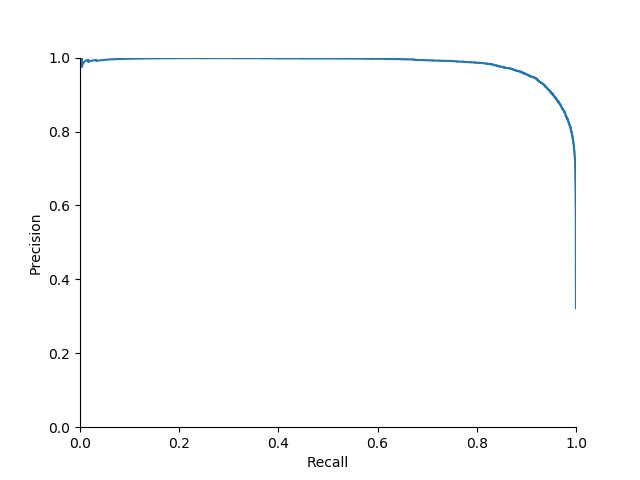

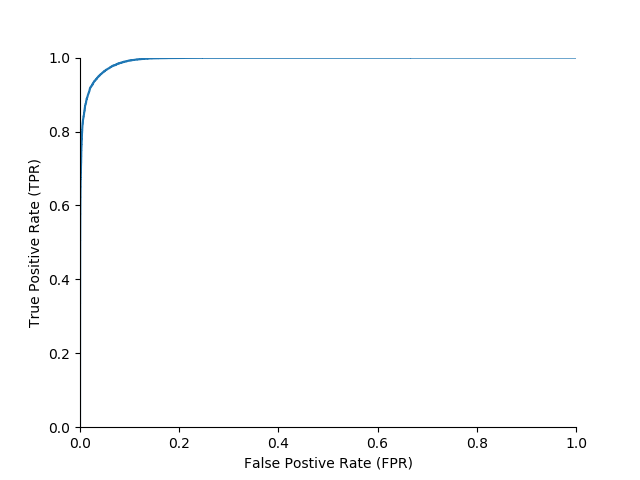

In [6]:
display_pr_roc_curves(model_dir, 'ood-eval-cifar10', UncertaintyMeasuresEnum.CONFIDENCE)

In [7]:
# VGG6 Model's evaluation results for ood detect task - against OMNIGLOT (ood dataset used in training)
with open(f'{model_dir}/ood-eval-cifar10/results.txt', 'r') as f:
    print(f.read())

Classification Error: 5.2 
NLL: 4.870999813079834 
IN data analysis: Correct-0.0, Wrong-0.0, Reject-1.0
OUT data analysis: Problem-0.0, Reject-1.0
AUPR using confidence: 98.3
AUROC using confidence: 99.4
AUPR using total_uncertainty: 99.0
AUROC using total_uncertainty: 99.6
AUPR using expected_data_uncertainty: 99.4
AUROC using expected_data_uncertainty: 99.7
AUPR using distributional_uncertainty: 63.2
AUROC using distributional_uncertainty: 90.5
AUPR using differential_entropy: 97.4
AUROC using differential_entropy: 98.4



In [8]:
# VGG6 Model's evaluation results for ood detect task - against SVHN (ood dataset not seen during training)
with open(f'{model_dir}/ood-eval-cifar100/results.txt', 'r') as f:
    print(f.read())

Classification Error: 5.2 
NLL: 4.870999813079834 
IN data analysis: Correct-0.0, Wrong-0.0, Reject-1.0
OUT data analysis: Problem-0.0, Reject-1.0
AUPR using confidence: 97.5
AUROC using confidence: 99.0
AUPR using total_uncertainty: 98.5
AUROC using total_uncertainty: 99.4
AUPR using expected_data_uncertainty: 98.8
AUROC using expected_data_uncertainty: 99.4
AUPR using distributional_uncertainty: 67.6
AUROC using distributional_uncertainty: 91.4
AUPR using differential_entropy: 95.4
AUROC using differential_entropy: 97.1



In [5]:
# VGG6 Model's evaluation results for ood detect task - against CIFAR-10 (ood dataset not seen during training)
with open(f'{model_dir}/ood-eval-cifar10/results.txt', 'r') as f:
    print(f.read())

Classification Error: 0.6 
NLL: 4.020999908447266 
AUPR using confidence: 100.0
AUROC using confidence: 100.0
AUPR using total_uncertainty: 100.0
AUROC using total_uncertainty: 100.0
AUPR using expected_data_uncertainty: 100.0
AUROC using expected_data_uncertainty: 100.0
AUPR using distributional_uncertainty: 99.9
AUROC using distributional_uncertainty: 100.0
AUPR using differential_entropy: 100.0
AUROC using differential_entropy: 100.0



## Misclassification Detection - confidence

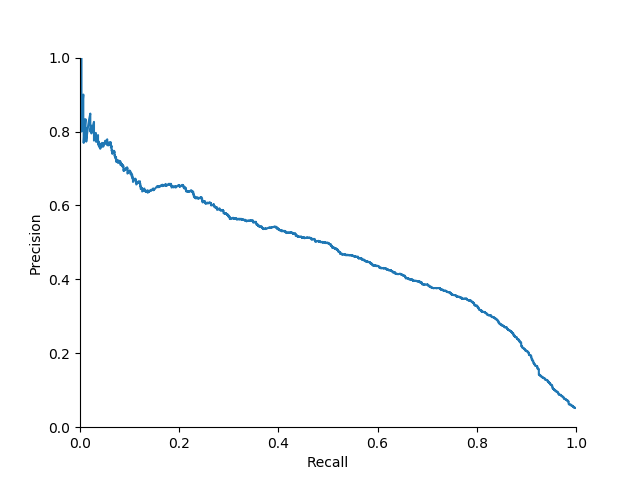

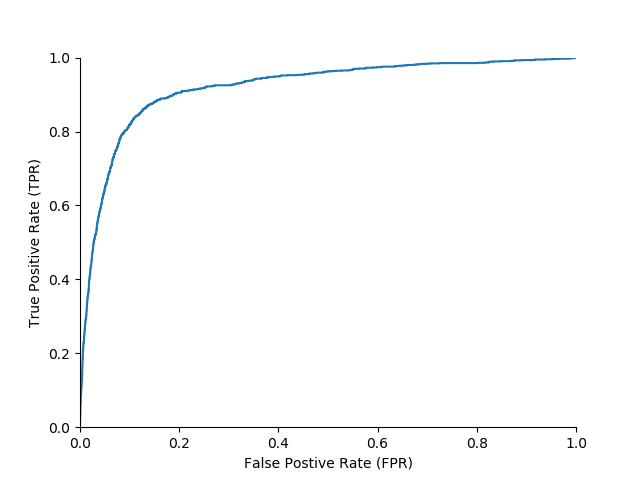

In [9]:
display_pr_roc_curves(model_dir, 'eval', UncertaintyMeasuresEnum.CONFIDENCE)

In [10]:
# VGG6 Model's evaluation results for misclassification task
with open(f'{model_dir}/eval/results.txt', 'r') as f:
    print(f.read())

Classification Error: 5.2 
NLL: 4.870999813079834 
IN data analysis: Correct-0.0, Wrong-0.0, Reject-1.0
AUPR using confidence: 47.3
AUROC using confidence: 91.9
AUPR using total_uncertainty: 45.8
AUROC using total_uncertainty: 91.6
AUPR using expected_data_uncertainty: 36.8
AUROC using expected_data_uncertainty: 88.6
AUPR using distributional_uncertainty: 38.9
AUROC using distributional_uncertainty: 89.3
AUPR using differential_entropy: 6.6
AUROC using differential_entropy: 57.9

